


# Project: TMDB Movie Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href='#Q1'>Question 1</a></li>
    <li><a href='#Q2'>Question 2</a></li>
    <li><a href='#Q3'>Question 3</a></li>
    <li><a href='#Q4'>Question 4</a></li>
    <li><a href='#Q5'>Question 5</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this report I am analysing <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv" target="_blank" style="text-decoration:none;color:red;font-weight:bold">TMDB Movie Dataset</a>. This dataset contains information about 10,000 movies like the title, cast, popularity, budget, revenue, Director, runtime, genres, production house, release date,vote_count etc. I will be using this dataset to answer a few questions. 

> <ol>
    <li>Which year has the highest number of movie releases? Which year has the lowest number of movie releases? How has the trend of movies released per year changed over the years?</li>
    <li>Which movies have the shortest and longest runtimes?</li>
    <li>The top 10 movies which made the highest profit?</li>
    <li>Which genre are more profitable than others?</li>
    <li> Is there a corelation between budget and profit?</li>
  </ol>

In [131]:
# Importing packages we will be using in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>In this section of the report we will load the data, make an assessment and then clean the data. After performing the initial assessment we can note the following points.
<ul>
    <li>The dataset has 10866 rows and 21 columns.</li>
    <li>I did not need all the columns for my analysis. I will remove columns like homepage, imdb_id(I will use id as unique identifier as it has 10866 non-null values of which 10865 are unique values.), budget, revenue( instead of budget and revenue I will use budget_adj and revenure_adj as these values keep inflation in consideration and are standardized to 2010 ), overview, tagline.</li>
    <li>Since the currency for revenue and budget is not known I have assumed it to be dollars. Since I will remove the columns budget and revenue henceforth these words will reflect adjusted budget and revenue respectively.</li>
    <li>During the process of data wrangling I have identified a single row of duplicated data. I have also observed that there are 10866 original_title but only 10571 unique original_title. This requires further exploration.</li>
    <li>I have identified the datatypes of each column. Incorrect data types: Release date is identified as string instead of datetime.</li>
    <li>The number of non-null values and the number of unique values for each column in the dataset have been identified.</li>
</ul>

### General Properties

In [132]:
#Load your data
df=pd.read_csv('tmdb_movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [133]:
#identify the number of rows and columns
df.shape

(10866, 21)

In [134]:
#identify the data types of each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [135]:
#find the number of non-null values in each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [136]:
# find the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [137]:
#get a count of duplicates
sum(df.duplicated())

1

<a href="https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python" style="text-decoration:none;">Click to open the link to the stackoverflow answer has been used to get list of duplicate items for particular columns as seen below</a>

In [138]:
# since we observed earlier that 'original_title' has only 10571 unique values I have eliminated the possibility of duplicated data of same movies
#There is a single row of duplicated data, the second set of duplicates have different release dates and hence 2 movies with same name and cast.
df[df.duplicated(['original_title','cast'],keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,9.670000e+05
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,9.670000e+05
4063,28004,tt0359639,0.371510,6000000,0,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,NaN,Tyler Perry,NaN,...,"Just as the southern matriarch, Madea buries h...",0,Comedy,NaN,1/25/02,49,5.9,2002,7.273568e+06,0.000000e+00
6701,16781,tt0455612,0.552267,6000000,57231524,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,NaN,Tyler Perry,NaN,...,Based upon Tyler Perry's acclaimed stage produ...,110,Drama|Comedy|Romance,Lions Gate Films,2/24/06,63,6.0,2006,6.490015e+06,6.190557e+07


In [139]:
#data statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [140]:
#check for names of columns which have missing values
#if you need name and number the use the code in the cell below
df.columns[df.isnull().any()]

Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object')

In [141]:
#checking for the number of missing values in each column
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


## Data Cleaning Process

> During the data wrangling process I have observed changes that need to be made on the dataset so that we have a clean dataset. The changes that need to be made are:
> <ol>
    <li>I will remove columns like imdb_id, homepage, tagline which are not required for my data analysis</li>
    <li>There is a single row of duplicated data which will be removed.</li>
    <li>The datatype of release_date is string which I will change to datetime which is more suitable.</li>
    <li>Certain columns like cast and genre contain multiple values separated by | character.</li>
    <li>Remove rows which have value zero or missing for budget_adj, revenue_adj, runtime.</li>
  </ol>

> ### Step 1: Remove columns which are not necessary for the data process

In [142]:
# Drop columns not necessary for analysis
df.drop(['imdb_id','budget','revenue','homepage','tagline','keywords'], axis=1, inplace=True)

In [143]:
#confirm changes
df.head(2)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08



>### Step 2: Remove Duplicated Data Row

In [144]:
#remove the row of duplicated data
df.drop_duplicates(inplace=True)

In [145]:
#confirm that there are no more duplicates
#output should be zero
sum(df.duplicated())

0


> ### Step 3: Change datatype where necessary

In [146]:
# change datatype of release date from string to datetime
df['release_date']=pd.to_datetime(df['release_date'])

In [147]:
#confirm changes
print(df['release_date'].dtypes)

datetime64[ns]


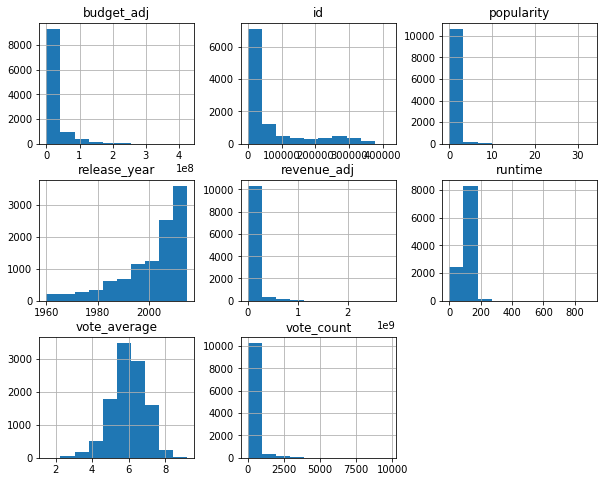

In [148]:
#plot a histogram
df.hist(figsize=(10,8));

> Now that we have performed the basic data cleaning steps we can start the exploration process.

<a id='eda'></a>
## Exploratory Data Analysis


<a id='Q1'></a>
### Question 1 : Which year has the highest number of movie releases? Which year has the lowest number of movie releases? How has the trend of movies released per year changed over the years?

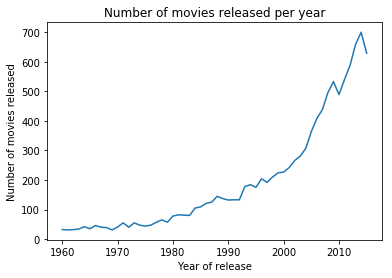

In [149]:
#Find the number of movies released each year
no_of_releases=df.groupby(['release_year'])['release_year'].count()
#plot the number of movies released each year
plt.plot(no_of_releases)
plt.title('Number of movies released per year')
plt.xlabel('Year of release')
plt.ylabel('Number of movies released');

> We can observe from the graph that there has been an increase in the number of movies released per year over the years with a drastic increase after 2000. 

In [150]:
#find the year with highest number of movies released
year_max=no_of_releases.idxmax(axis=0)
year_max

2014

> The year 2014 has the maximum number of movies released.

In [151]:
#find the year with the lowest number of movies released
year_min=no_of_releases.idxmin(axis=0)
year_min

1961

> The year 1961 has the least number of movies released.

<a id='Q2'></a>
### Question 2: Which movies have the shortest and longest runtimes?

In [152]:
#select records having runtime>0 as runtime cannot be equal to zero 
# we have already checked for missing values during data wrangling
df1=df.query('runtime !=0')

In [153]:
#find index of movie with longest runtime
high_index=df1['runtime'].idxmax()
#use index to find the title of movie with longest runtime
longest_movie=df1['original_title'][high_index]
print("The longest movie is: "+longest_movie)

The longest movie is: The Story of Film: An Odyssey


In [154]:
#runtime of longest movie
df1.runtime.max()

900

In [155]:
#find index of movie with the shortest runtime
low_index=df1['runtime'].idxmin()
#use index to find the title of movie with the shortest runtime
shortest_movie=df1['original_title'][low_index]
print("The shortest movie is: "+shortest_movie)

The shortest movie is: Fresh Guacamole


In [156]:
#runtime of shortest movie
df1.runtime.min()

2

> The shortest movie is 'Fresh Guacamole' with a runtime of 2 minutes and the longest movie is 'The Story of Film: An Odyssey' with a runtime of 900 minutes.

<a id='Q3'></a>
### Question 3: The top 10 movies which made the highest profit

In [157]:
# We know that revenue_adj and budget_adj have no missing values
# But there are rows with value zero which we need to remove
df2=df1.query('revenue_adj!=0 & budget_adj!=0')
#find the new sample size
df2.shape

(3854, 15)

In [158]:
#calculate profit and store in a new column
df2['profit']=df2['revenue_adj']-df2['budget_adj']

#find the top 10 movies which made the highest profit
#
df_top_10=df2.sort_values(by=['profit'],ascending=False).head(10)
df_top_10['original_title']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1329                          Star Wars
1386                             Avatar
5231                            Titanic
10594                      The Exorcist
9806                               Jaws
8889         E.T. the Extra-Terrestrial
3          Star Wars: The Force Awakens
8094                            The Net
10110    One Hundred and One Dalmatians
7309            The Empire Strikes Back
Name: original_title, dtype: object

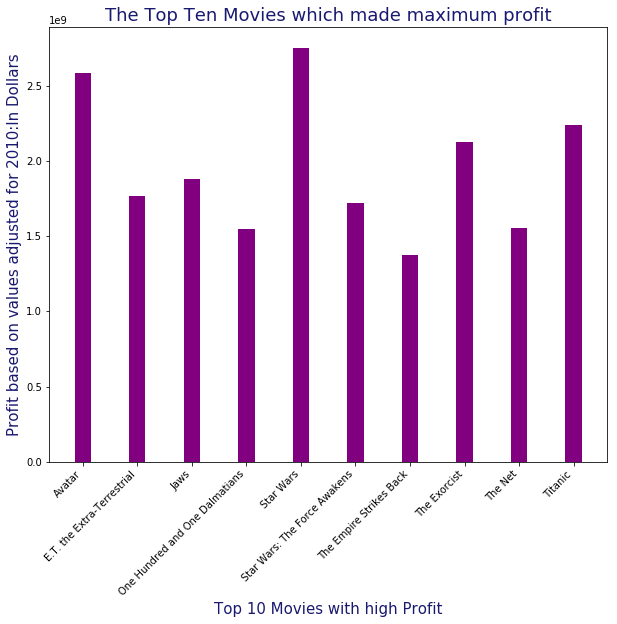

In [159]:
#plot bar graph to reflect the top ten movies with highest profit(inflated values for 2010)
plt.subplots(figsize=(10, 8))
plt.bar(df_top_10.original_title,df_top_10.profit,width=0.3,color='#800080')

#rotate x-axis label
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right') #Source: https://benalexkeen.com/bar-charts-in-matplotlib/

#set chart titles and labels
plt.title('The Top Ten Movies which made maximum profit',fontsize=18,color='#191970')
plt.xlabel('Top 10 Movies with high Profit',fontsize=15,color='#191970')
plt.ylabel('Profit based on values adjusted for 2010:In Dollars',fontsize=15,color='#191970');

> From the bar chart we can observe that 'Star Wars' is the movie which made maximum profit followed by 'Avatar'. These 10 movies are movies which made the highest profit in all time.(inflation has been considered)

<a id='Q4'></a>
### Question 4: Which genre are more profitable than others?

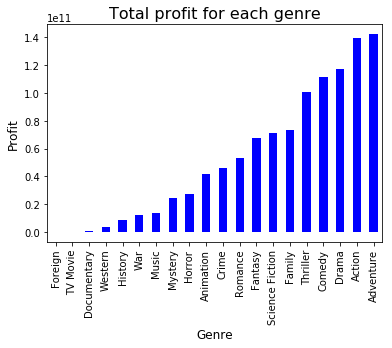

In [160]:
# Since genres has string separated by '|' we will separate it into rows

genres = df2.genres.str.split('|', expand=True).values.ravel() # Source:https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
profit= np.repeat(df2.profit.values, len(genres) / len(df2))

df3=pd.DataFrame({'genres': genres,
              'profit': profit})
# drop missing values 
df3=df3.dropna()
#calculate total profit generated by each genre using groupby
profit_by_genre=df3.sort_values(['profit']).groupby('genres')['profit'].sum()
#plot the profit by genre 
profit_by_genre.sort_values().plot(kind='bar',color='blue',width=0.5);
plt.title('Total profit for each genre',fontsize=16);
plt.ylabel('Profit',fontsize=12);
plt.xlabel('Genre',fontsize=12);

In [163]:
#genre which made maximum profit
profit_by_genre.idxmax()

'Adventure'

In [164]:
#genre which made minimum profit
profit_by_genre.idxmin()

'Foreign'

> The genre 'Adventure' has made the maximum profit and the least profitable genre is 'Foreign'.
'Thriller' , 'Comedy', 'Drama', 'Action' are some of the other profitable genres.

<a id='Q5'></a>
### Question 5: Is there a corelation between budget and profit?

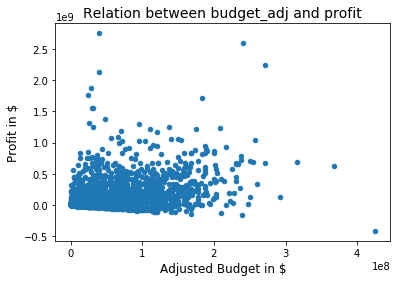

In [165]:
# scatterplot showing relation between budget_adj and profit
df2.plot(x='budget_adj',y='profit',kind='scatter');
plt.title('Relation between budget_adj and profit',fontsize=14);
plt.ylabel('Profit in $',fontsize=12);
plt.xlabel('Adjusted Budget in $',fontsize=12);

In [122]:
#find the correlation coefficient using pearson method
df2['budget_adj'].corr(df2['profit'],method='pearson') #https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr

0.4043442907401168

In [123]:
#find the correlation coefficient using spearman method
df2['budget_adj'].corr(df2['profit'],method='spearman')

0.31101061977143435

> <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/">Reference to understand correlation and difference between Pearson and Spearman method.</a>

> A correlation coefficient measures the extent to which two variables tend to change together. It describes the strength and direction of their relationship. It doesnot indicate causation. The correlation coefficient calculated using pearson method shows a positive value of 0.404 and for spearman method the value is 0.311. Both the values show a low positive correlation.This means that there is correlation between budget and profit but it is not strong. 

<a id='conclusions'></a>
## Conclusions

> I have completed the data wrangling, data cleaning and exploration steps and documented them.
  In the process I have answered a few interesting questions. The number of movies released is increasing each year and there has been a very steep increase in recent year. The runtime of movies varies over a range of 2 minutes to 900 minutes. Star Wars is the movie which made the maximum profit followed by Avatar. I have explored the profitability of different genres and found Adventure to be the genre which made the most profit over the years. I was also interested to know if their is a correlation between budget and profit. Do movies which have more budget make more profit? Exploring this I found that this correlation is very weak. The correlation coefficient was calculated using the pearson method and the spearman method (outliers were not removed). The correlation doesnot imply causation.
  I have used the Udacity course material for reference along with a number of stackoverflow articles. 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])